In [ ]:
# Load TF-DF
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Upload the csv file from the local drive
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
# Load the heart disease dataset into a Pandas data frame
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Split the dataset into training set and testing set
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_df, test_df = split_dataset(df)
print("{} examples in training, {} examples for testing".format(
    len(train_df), len(test_df)))

df.describe()
df.head(3)

621 examples in training, 297 examples for testing


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [ ]:
# Convert the Pandas dataframe into a TensorFlow dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="HeartDisease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="HeartDisease")

In [ ]:
# Specify which model to use
model = tfdf.keras.RandomForestModel(verbose=2)

# Train the model using Random Forest algorithm
model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpmg3bcew8 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Age': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Sex': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'ChestPainType': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'RestingBP': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Cholesterol': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'FastingBS': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'RestingECG': <tf.Tensor 'data_6:0' shape=(None,) dtype=string>, 'MaxHR': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'ExerciseAngina': <tf.Tensor 'data_8:0' shape=(None,) dtype=string>, 'Oldpeak': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'ST_Slope': <tf.Tensor 'data_10:0' shape=(None,) dtype=string>}
Label: Tensor("data_11:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Age': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor

[INFO 24-01-17 12:28:15.8287 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-01-17 12:28:15.8289 UTC kernel.cc:772] Collect training examples
[INFO 24-01-17 12:28:15.8289 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-01-17 12:28:15.8291 UTC kernel.cc:391] Number of batches: 1
[INFO 24-01-17 12:28:15.8291 UTC kernel.cc:392] Number of examples: 680
[INFO 24-01-17 12:28:15.8295 UTC kernel.cc:792] Training dataset:
Number of records: 680
Number of columns: 12

Number of columns by type:
	CATEGORICAL: 6 (50%)
	NUMERICAL: 6 (50%)

Columns:

CATEGORICAL: 6 (50%)
	1: "ChestPainType" CATEGORICAL has-dict vocab-size:5 zero-ood-items most

Model trained in 0:00:00.560989
Compiling model...
Model compiled.


In [ ]:
# Obtain summary of the model
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (11):
	Age
	ChestPainType
	Cholesterol
	ExerciseAngina
	FastingBS
	MaxHR
	Oldpeak
	RestingBP
	RestingECG
	ST_Slope
	Sex

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.       "ST_Slope"  0.332188 ################
    2.  "ChestPainType"  0.271442 ##########
    3. "ExerciseAngina"  0.209429 #####
    4.        "Oldpeak"  0.205500 #####
    5.          "MaxHR"  0.195534 ####
    6.    "Cholesterol"  0.181702 ###
    7.            "Age"  0.165381 #
    8.            "Sex"  0.160726 #
    9.      "RestingBP"  0.160138 #
   10.      "FastingBS"  0.153895 
   11.     "RestingECG"  0.1450

In [ ]:
# Evaluate the model using training set
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 112ms/step - loss: 0.0000e+00 - accuracy: 0.8739

loss: 0.0000
accuracy: 0.8739


In [ ]:
model.make_inspector().evaluation()

Evaluation(num_examples=680, accuracy=0.8647058823529412, loss=0.4404156237183248, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

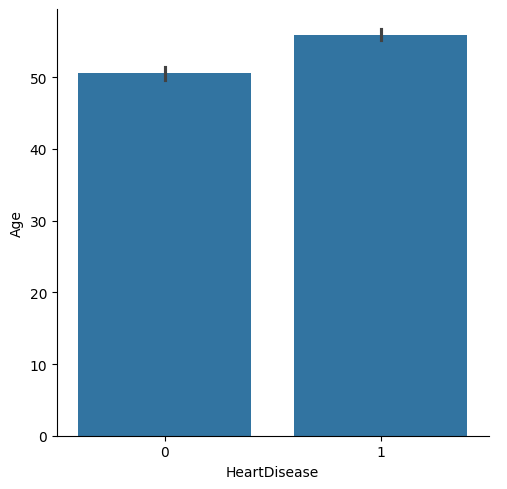

In [ ]:
sns.catplot(x='HeartDisease', y='Age', data=df, kind="bar")

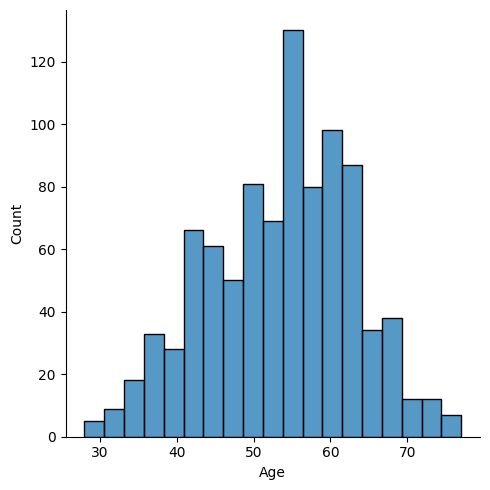

In [ ]:
sns.displot(data=df, x="Age")

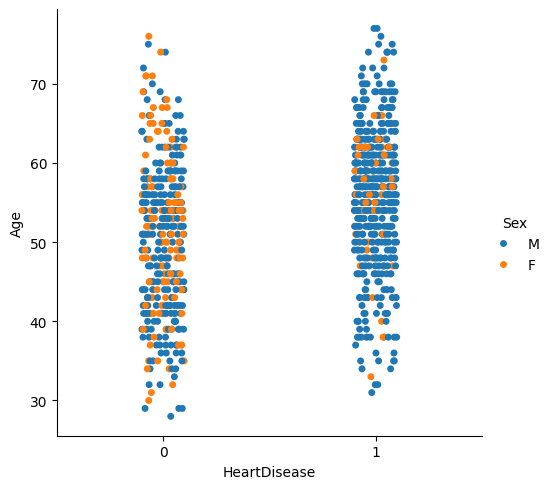

In [ ]:
sns.catplot(data=df, x="HeartDisease", y="Age", hue="Sex")